# Predicting if a customer is happy or not based on the answers they give to questions asked.

In [1]:
#Import the libraries
# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [2]:
#load the data
ACME_data = pd.read_csv("ACME-HappinessSurvey2020.csv")



# EDA and  dataset analysis 

In [3]:
#view the first rows
ACME_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
ACME_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


No missing values

In [5]:
#summary statistics- numerical features
ACME_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


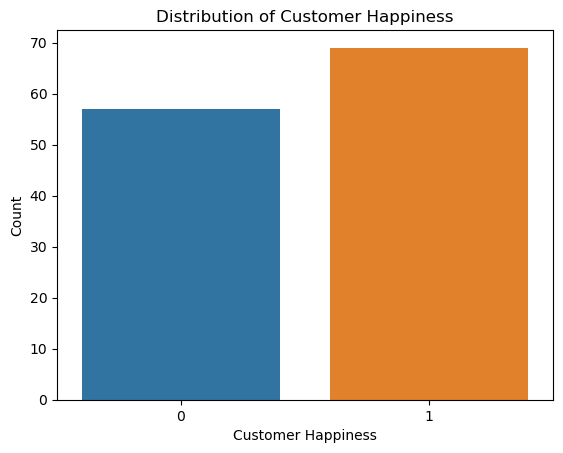

In [6]:
# distribution of the target variable
sns.countplot(x='Y', data=ACME_data)
plt.xlabel('Customer Happiness')
plt.ylabel('Count')
plt.title('Distribution of Customer Happiness')
plt.show()


#the happy customers have the highest distribution

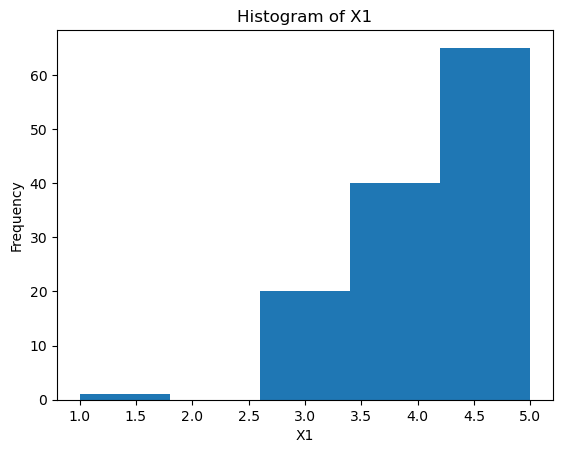

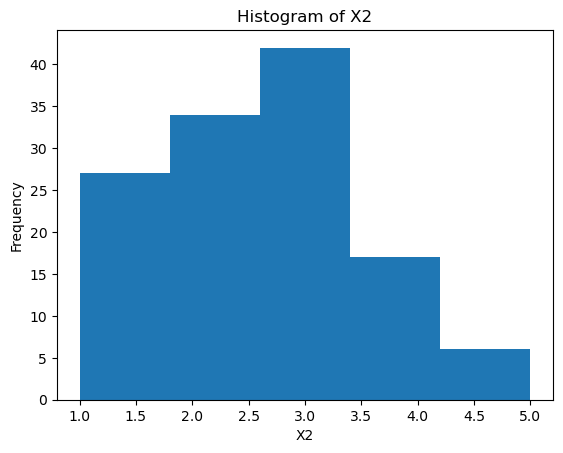

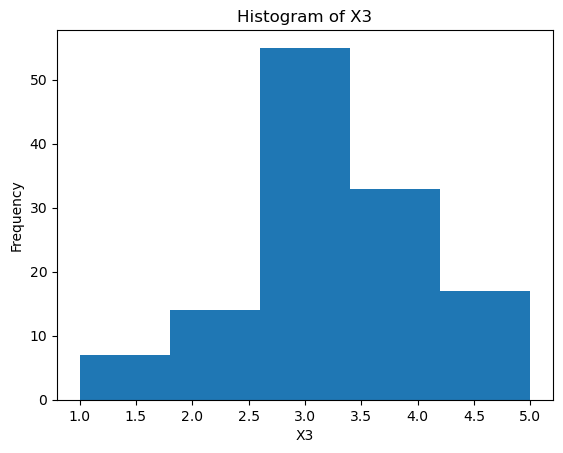

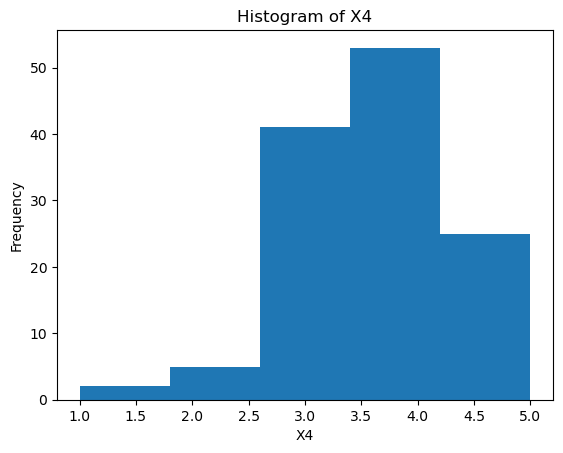

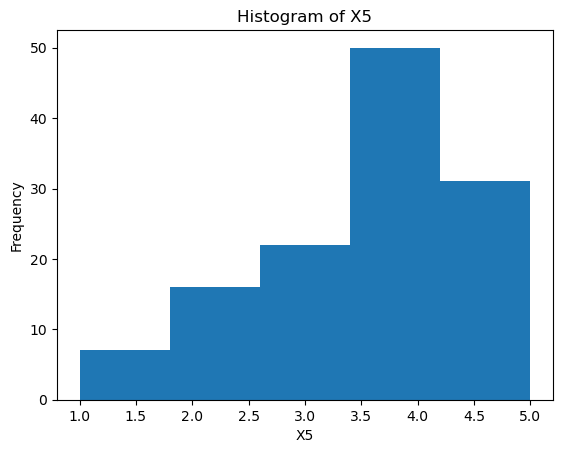

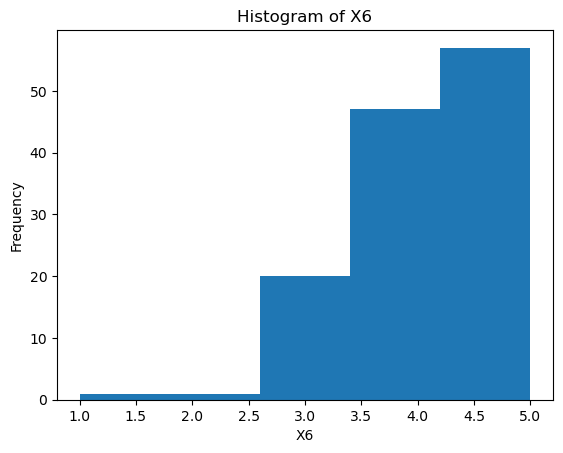

In [7]:
# Independent Variable Histograms
for column in ACME_data.drop('Y', axis=1):  # Exclude the target variable column
    plt.hist(ACME_data[column], bins=5)  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

X1,X3,X4,X5 and X6  are  Right-skewed thus have a positive skewness.

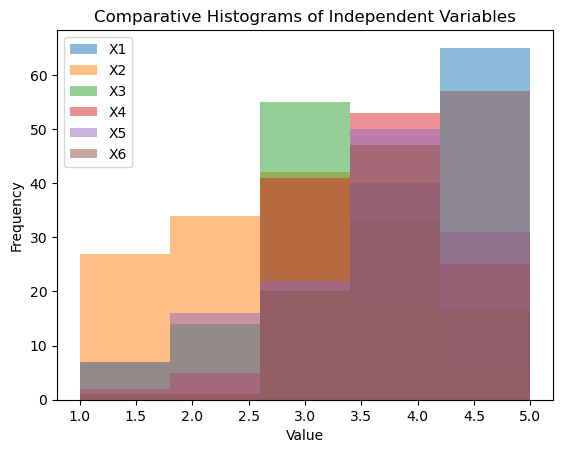

In [8]:
# Comparative Histograms
for column in ACME_data.drop('Y', axis=1):  # Exclude the target variable 
    plt.hist(ACME_data[column], bins=5, alpha=0.5, label=column) 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparative Histograms of Independent Variables')
plt.legend()
plt.show()

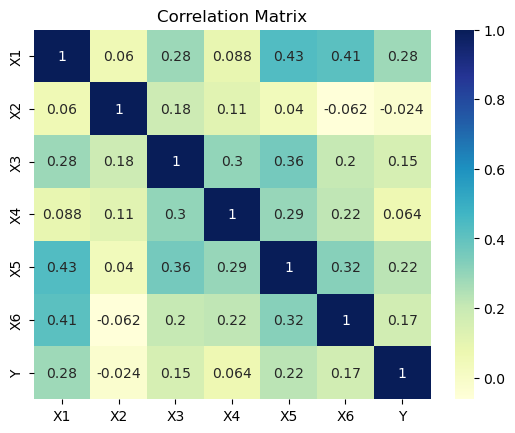

In [9]:
# correlations between features
columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
corr_matrix = ACME_data[columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

X2 is negatively correlated to Y and X6.


No high correlation between the Variables

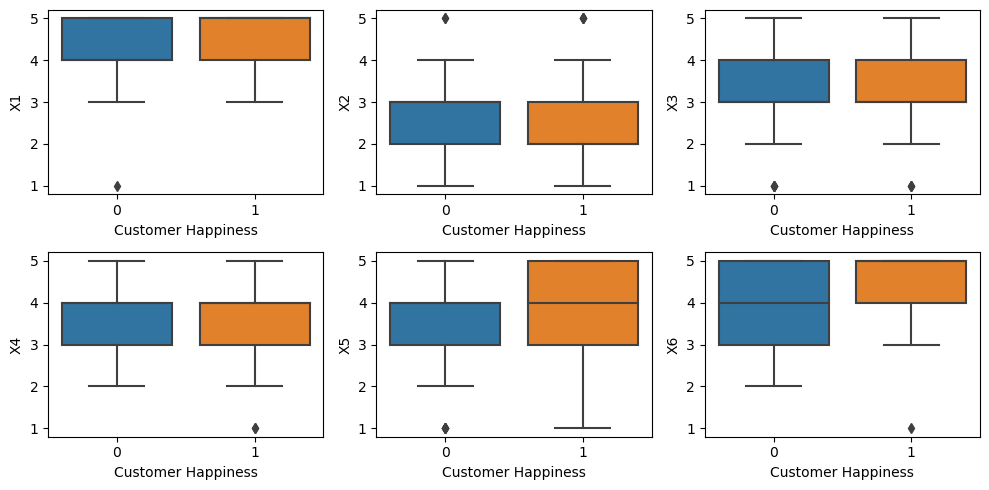

In [10]:
#relationship between each feature and the target variable
plt.figure(figsize=(10, 5))
for i, feature in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Y', y=feature, data=ACME_data)
    plt.xlabel('Customer Happiness')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


# Data Processing

In [11]:
# Input features
# Input features
X = ACME_data.drop('Y', axis=1)  

print(X.shape)

# Target feature
Y =  ACME_data['Y']  

print(Y.shape)

(126, 6)
(126,)


In [12]:
#  training and validation/test sets splits

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)


X_train: (100, 6)
X_test: (26, 6)
Y_train: (100,)
Y_test: (26,)


# Train and compare different  Models


In [13]:
#Logistic model
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred1 = model.predict(X_test)

acc_log = round(accuracy_score(Y_test, Y_pred1)*100,2)
print("accuracy:",round(acc_log,2,), "%")

accuracy: 46.15 %


In [16]:
#Random Forest model

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred2 = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(accuracy_score(Y_test, Y_pred2)*100,2)
print("accuracy:", round(acc_random_forest,2,), "%")

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred2)
print('Mean Squared Error:', mse)

accuracy: 61.54 %
Mean Squared Error: 0.38461538461538464


In [17]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred3 = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(accuracy_score(Y_test, Y_pred3)*100,2)


print("accuracy:", round(acc_sgd,2,), "%")

accuracy: 38.46 %


In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred4 = knn.predict(X_test)

acc_knn = round(accuracy_score(Y_test, Y_pred4)*100,2)
print("accuracy:", round(acc_knn,2,), "%")

accuracy: 42.31 %


In [19]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred5 = gaussian.predict(X_test)

acc_gaussian = round(accuracy_score(Y_test, Y_pred5)*100,2)
print("accuracy:",round(acc_gaussian,2,), "%")

accuracy: 42.31 %


In [20]:
# Perceptron
perceptron = Perceptron(max_iter=50)
perceptron.fit(X_train, Y_train)

Y_pred6 = perceptron.predict(X_test)

acc_perceptron = round(accuracy_score(Y_test, Y_pred6)*100,2)
print("accuracy:", round(acc_perceptron,2,), "%")

accuracy: 38.46 %


In [21]:
# Linear SVC
linear_svc = LinearSVC(max_iter=20000)
linear_svc.fit(X_train, Y_train)

Y_pred7 = linear_svc.predict(X_test)

acc_linear_svc = round(accuracy_score(Y_test, Y_pred7)*100,2)
print("accuracy:", round(acc_linear_svc,2,), "%")

accuracy: 46.15 %


In [22]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred8 = decision_tree.predict(X_test)

acc_decision_tree = round(accuracy_score(Y_test, Y_pred8)*100,2)
print("accuracy:", round(acc_decision_tree,2,), "%")

accuracy: 65.38 %


In [23]:
#Gradient Boosting Classifier

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, Y_train)


Y_pred9 = gb_classifier.predict(X_test)


# Evaluate the accuracy of the model
accuracy_gb_classifier =round(accuracy_score(Y_test, Y_pred9)*100,2)
print("accuracy:", round(accuracy_gb_classifier,2,),"%")

accuracy: 61.54 %


# Get the best models

In [24]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree','Gradient Boosting'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree, accuracy_gb_classifier]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
65.38,Decision Tree
61.54,Random Forest
61.54,Gradient Boosting
46.15,Support Vector Machines
46.15,Logistic Regression
42.31,KNN
42.31,Naive Bayes
38.46,Perceptron
38.46,Stochastic Gradient Decent


Desion Tree and Gradient Bosting classifier has the best results.

By use of cross validation check how they perform.

# K-Fold Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

#perform the validation on Gradient Boosting
gb= GradientBoostingClassifier(n_estimators=100)
scores = cross_val_score(gb, X_train, Y_train, cv=2, scoring = "accuracy")


print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.58 0.56]
Mean: 0.5700000000000001
Standard Deviation: 0.009999999999999953


Our model has a average accuracy of 57% with a standard deviation of 3 %. 

In [26]:

#perform the validation on Desicion Tree
dt= DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, Y_train, cv=2, scoring = "accuracy")


print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.56 0.56]
Mean: 0.56
Standard Deviation: 0.0


# Increasing the performance

#Future Importance

In [27]:
import numpy as np
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [28]:
importances.head(6)

,importance
feature,
X1,0.205
X5,0.184
X3,0.176
X4,0.158
X6,0.146
X2,0.131


<Axes: xlabel='feature'>

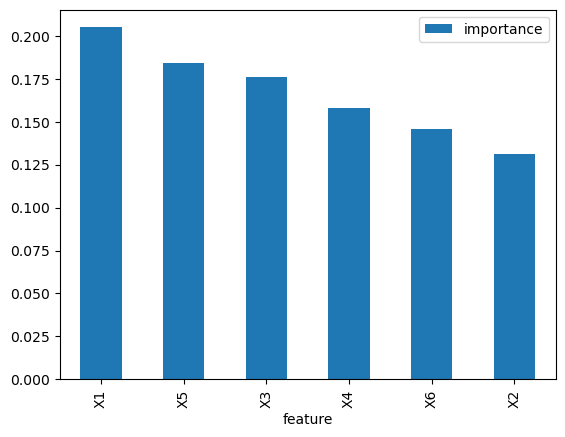

In [29]:
importances.plot.bar()

 We can remove X2, X4 and X6 to see if there would be significant change

In [30]:
X_train = X_train.drop(["X2","X4","X6"], axis=1)
X_test = X_test.drop(["X2","X4","X6"], axis=1)

In [31]:
print(X_train.shape)
print(X_test.shape)

(100, 3)
(26, 3)


In [36]:
#Train Decision Tree again
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_prediction = decision_tree.predict(X_test)


acc_decision_tree = round(accuracy_score(Y_test, Y_prediction)*100,2)
print(round(acc_decision_tree,2,), "%")

76.92 %


In [39]:
#Train gradient boosting again again
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, Y_train)
Y_prediction = gradient_boosting.predict(X_test)


acc_gradient_boosting = round(accuracy_score(Y_test, Y_prediction)*100,2)
print(round(acc_gradient_boosting,2,), "%")

65.38 %


In [ ]:
The best model in predicting the happiness of the customer is decision tree.

The Most important features are X1, X5, and X3.